In [3]:
# Import the foundational library for data manipulation and analysis
import pandas as pd

# Import the core library for numerical operations
import numpy as np

# Import the primary plotting library
import matplotlib.pyplot as plt

# Import a higher-level plotting library built on top of Matplotlib
import seaborn as sns

# This is a 'magic command' in Jupyter. It ensures that any plots
# generated by Matplotlib or Seaborn will be displayed directly inside the notebook.
%matplotlib inline

# Import the specific function from scikit-learn to fetch our dataset
from sklearn.datasets import fetch_california_housing

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
# Call the fetch_california_housing function to load the dataset.
# The function downloads the data if it's not already cached and returns a Bunch object.
housing_bunch = fetch_california_housing()

# The Bunch object is now loaded into our variable. Let's explore what's inside.
# The .keys() method will show us all the different pieces of information it contains.
print("Keys available in the Bunch object:")
print(housing_bunch.keys())

Keys available in the Bunch object:
dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [5]:
# The 'DESCR' attribute contains a full description of the dataset.
# Printing it is a great way to familiarize yourself with the data you're about to work with.
print(housing_bunch.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
# Create a pandas DataFrame from the feature data and feature names.
# The pd.DataFrame() constructor is a powerful and flexible function.
# - The first argument is the data itself, which in our case is the NumPy array `housing_bunch.data`.
# - The `columns` argument takes a list of strings to use as the column headers.
housing_df = pd.DataFrame(data=housing_bunch.data, columns=housing_bunch.feature_names)

# Now, let's add the target variable (median house value) to our DataFrame.
# The target data is stored in `housing_bunch.target`.
# We can create a new column in a DataFrame by assigning a Series or array-like object to it
# using dictionary-style key assignment. We will name this new column 'MedHouseVal'.
# The name 'MedHouseVal' is derived from the dataset's description, representing Median House Value.
housing_df['MedHouseVal'] = housing_bunch.target

# Let's print a confirmation message.
print("DataFrame created successfully!")
print(f"The DataFrame has {housing_df.shape[0]} rows and {housing_df.shape[1]} columns.")

DataFrame created successfully!
The DataFrame has 20640 rows and 9 columns.


In [7]:
# The .head() method, when called on a DataFrame, returns the first n rows.
# By default, n is 5. This is one of the most frequently used commands in data analysis
# for getting a quick overview of the dataset.
# When a command like this is the last line in a Jupyter cell, the notebook
# will automatically render the output in a clean, formatted HTML table.
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
# The .info() method prints a concise summary of the DataFrame.
# This includes the index dtype and columns, non-null values, and memory usage.
# It's an essential tool for getting a quick technical overview of your data.
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
# The .describe() method generates descriptive statistics.
# It provides a summary of the central tendency, dispersion, and shape of a dataset's distribution.
# This will apply to all columns with numerical data types in our DataFrame.
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [10]:
# Step 2 Data Exploration

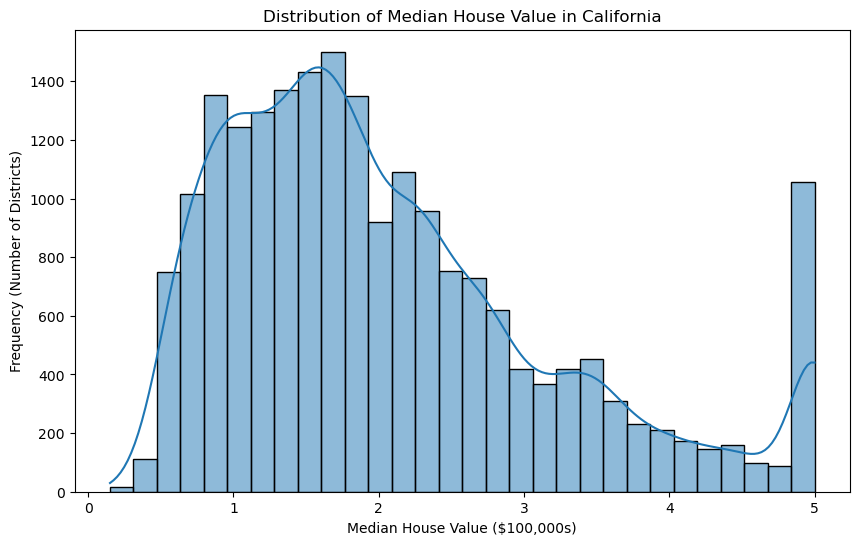

In [11]:
# We'll use both seaborn and matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# It's good practice to set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create the histogram using seaborn's histplot function.
# - data: The DataFrame containing our data.
# - x: The name of the column we want to plot.
# - bins: The number of bars to divide the data into. A good starting point.
# - kde: Kernel Density Estimate. This adds a smoothed line over the histogram
#        to better visualize the shape of the distribution.
sns.histplot(data=housing_df, x='MedHouseVal', bins=30, kde=True)

# Add a title and labels to make the plot informative
plt.title('Distribution of Median House Value in California')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency (Number of Districts)')

# Display the plot
plt.show()

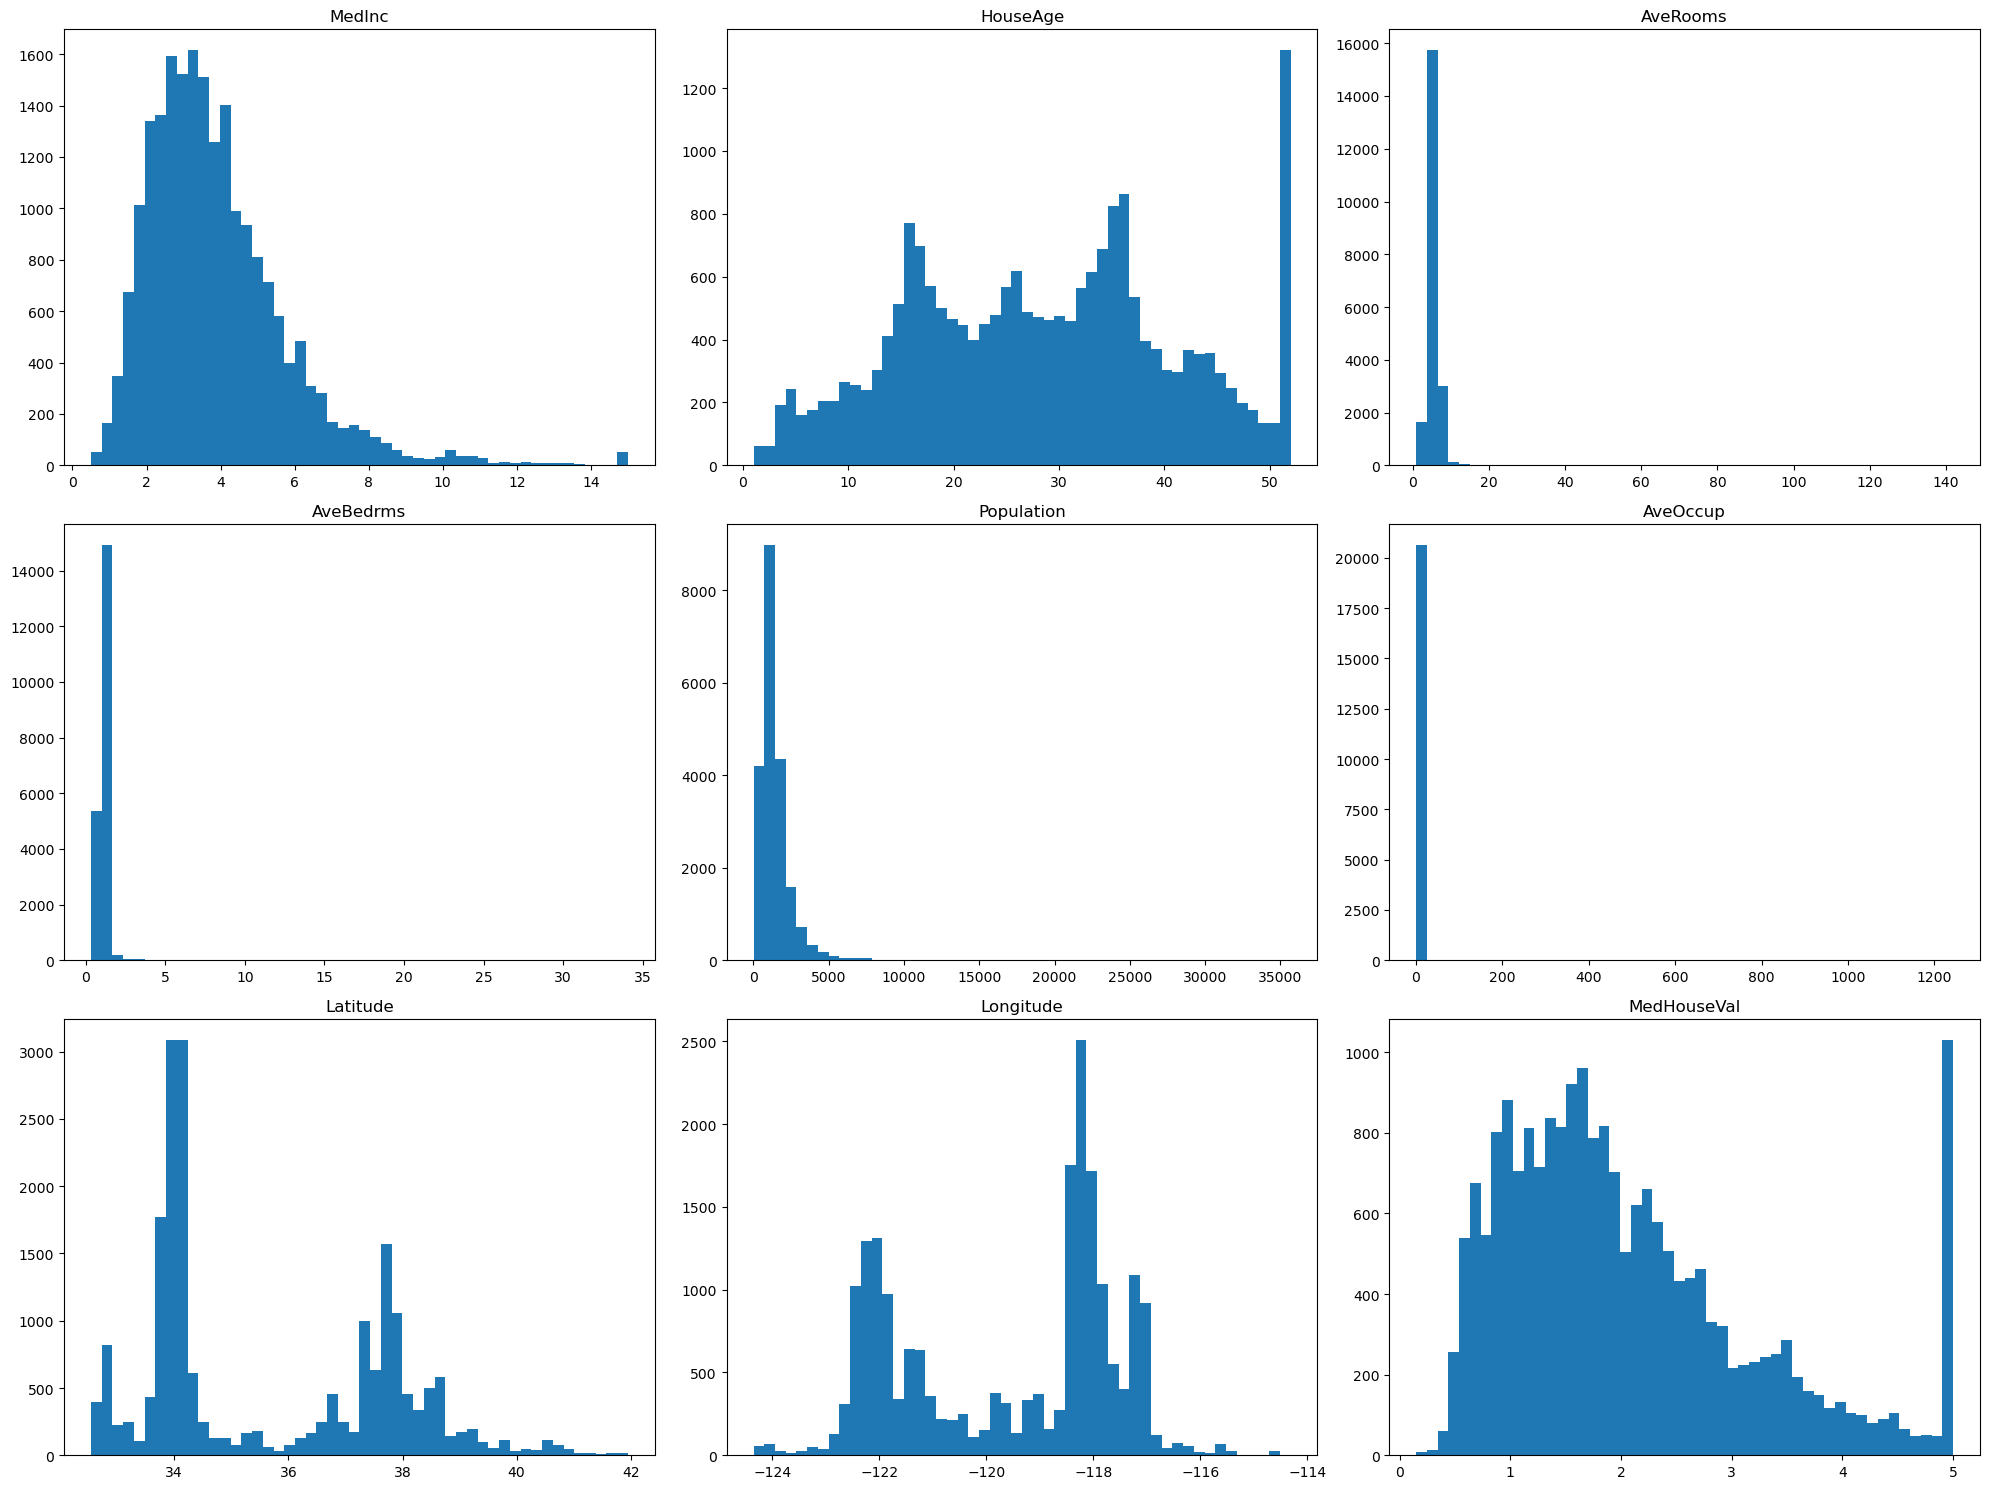

In [12]:
# The .hist() method on a pandas DataFrame is a powerful tool that automatically creates
# a histogram for each numerical column. It's an incredibly efficient way to get a
# quick overview of the distributions of all features at once.

# We pass several arguments to customize the output:
# - bins=50: We'll use 50 bins to get a more detailed view of the distributions.
# - figsize=(20, 15): We specify a large figure size (20 inches wide by 15 inches tall)
#   to ensure that the grid of plots is spacious and each individual plot is clear and readable.
# - grid=False: This is a stylistic choice to remove the background grid lines, which
#   can sometimes make plots look cluttered. The focus should be on the shape of the histogram bars.
housing_df.hist(bins=50, figsize=(20, 15), grid=False)

# The plt.tight_layout() function from Matplotlib is a very useful utility.
# It automatically adjusts the spacing between subplots to prevent titles, labels,
# or axes from overlapping. It's a great practice to call this after creating a figure
# with multiple subplots.
plt.tight_layout()

# Finally, plt.show() renders the entire figure with all its subplots.
plt.show()

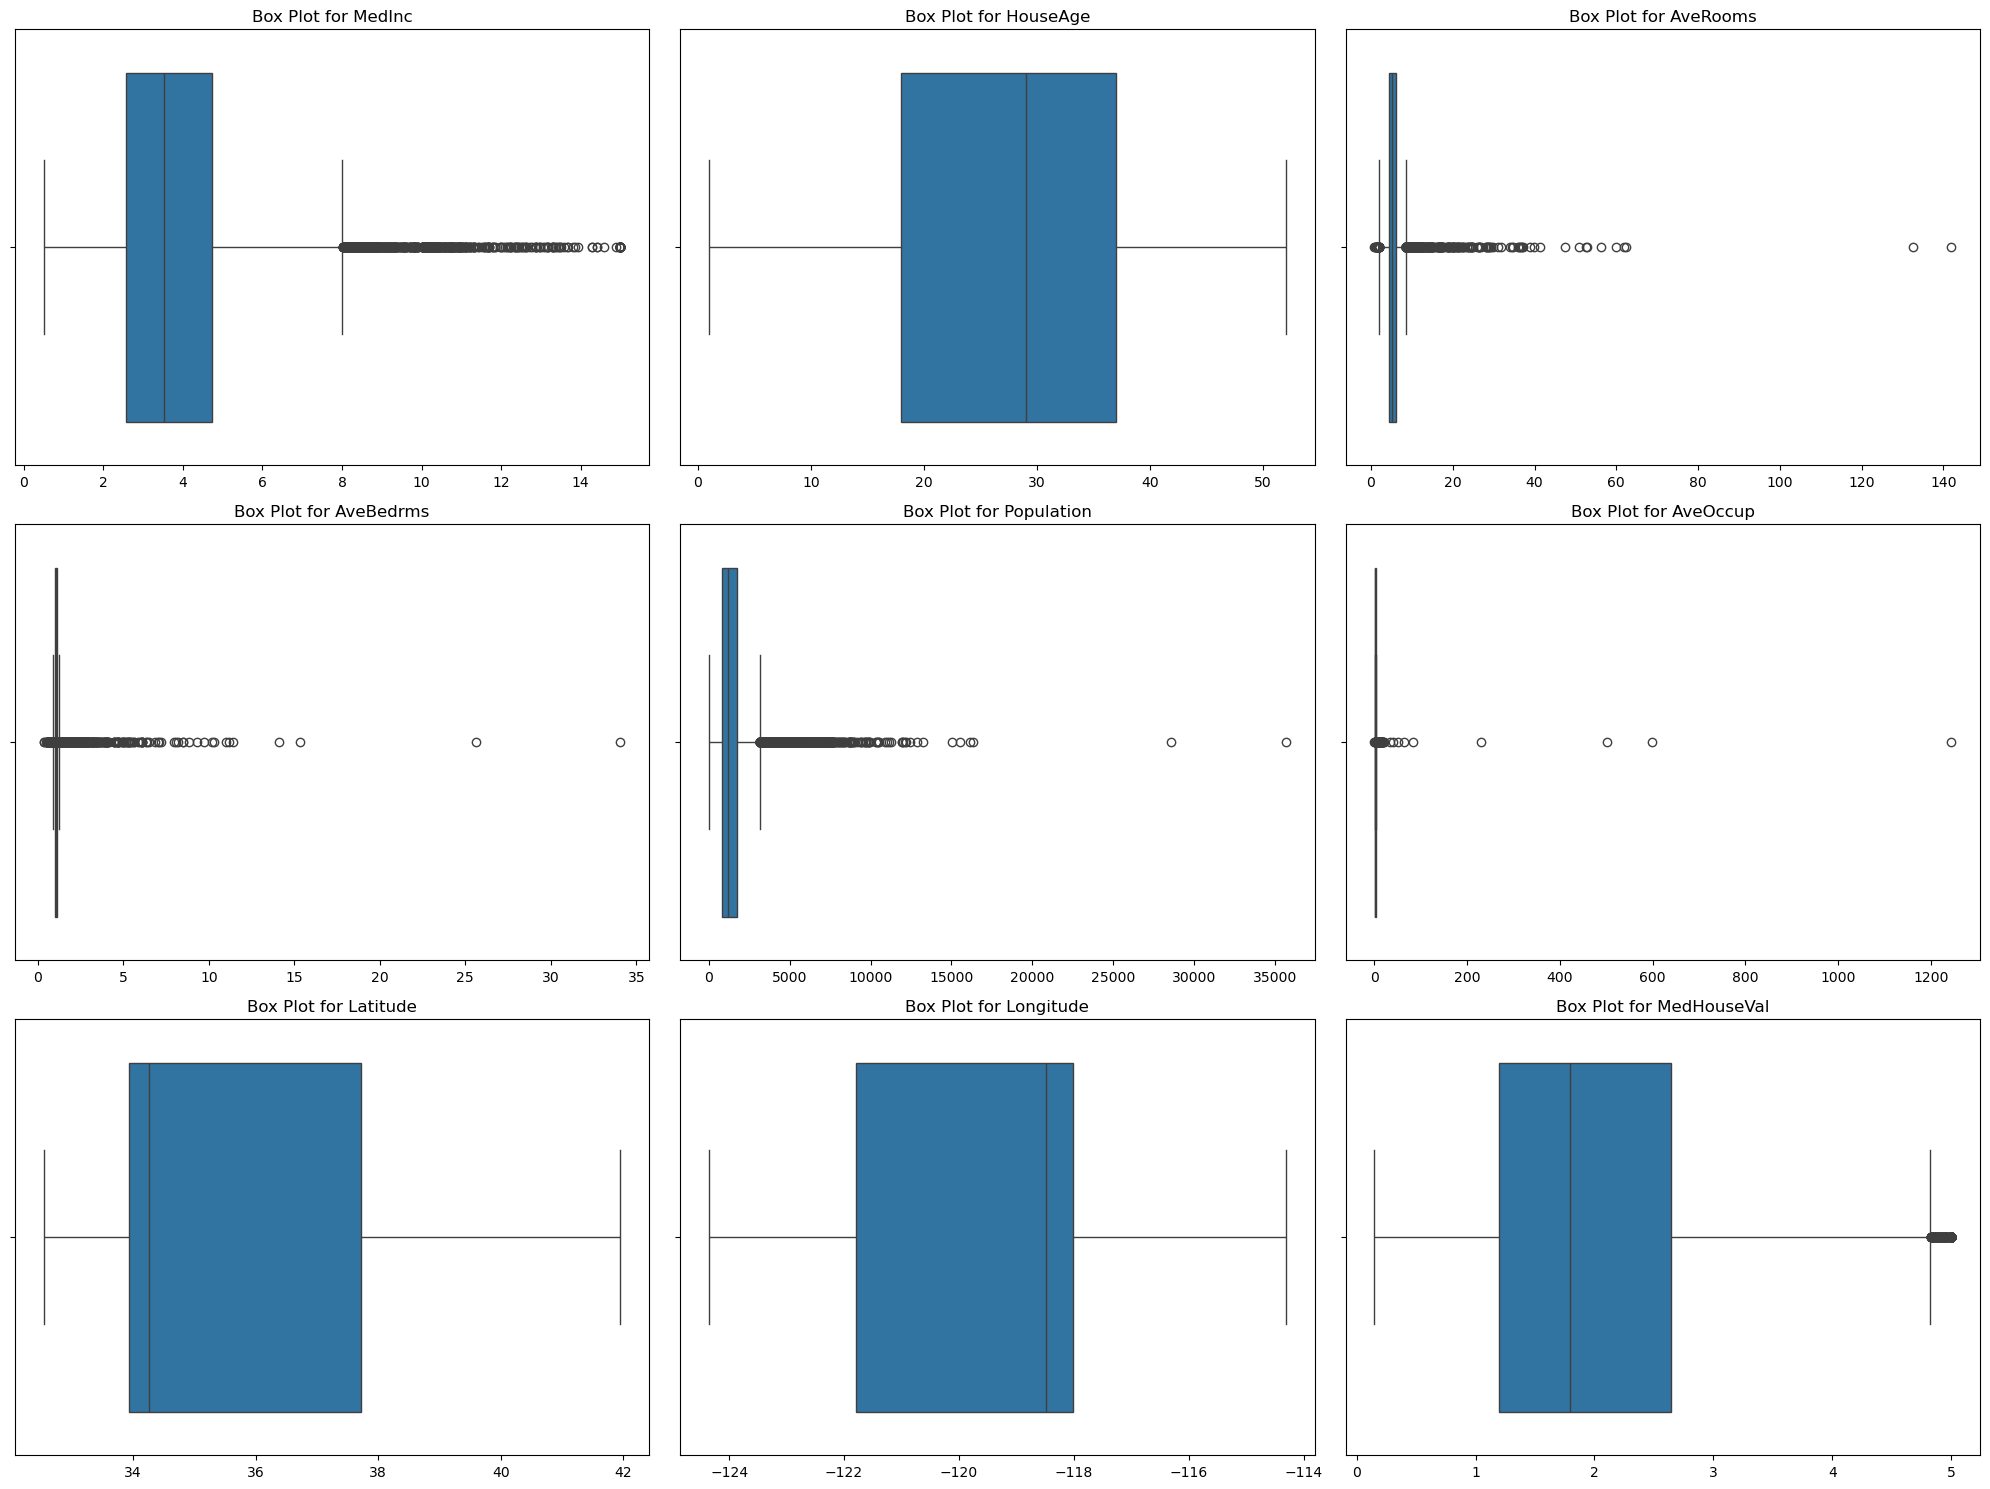

In [13]:
# Create a figure and a set of subplots.
# We have 9 columns, so a 3x3 grid is a perfect layout.
# `figsize` is set to make the overall grid large and readable.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

# The `axes` object is a 2D NumPy array of plot objects. We can flatten it
# into a 1D array to make it easier to loop over.
axes = axes.flatten()

# Loop through each column in the DataFrame and its corresponding subplot axis.
# `zip` is a handy function that pairs up elements from two lists.
for col, ax in zip(housing_df.columns, axes):
    # Create a box plot for the current column `col` on the current axis `ax`.
    sns.boxplot(x=housing_df[col], ax=ax)
    
    # Set a title for each subplot to know which feature it represents.
    ax.set_title(f'Box Plot for {col}', fontsize=12)
    
    # Clean up the x-axis label for better readability.
    ax.set_xlabel('')

# This command adjusts the padding between and around subplots to prevent overlap.
plt.tight_layout()

# Display the entire grid of plots.
plt.show()

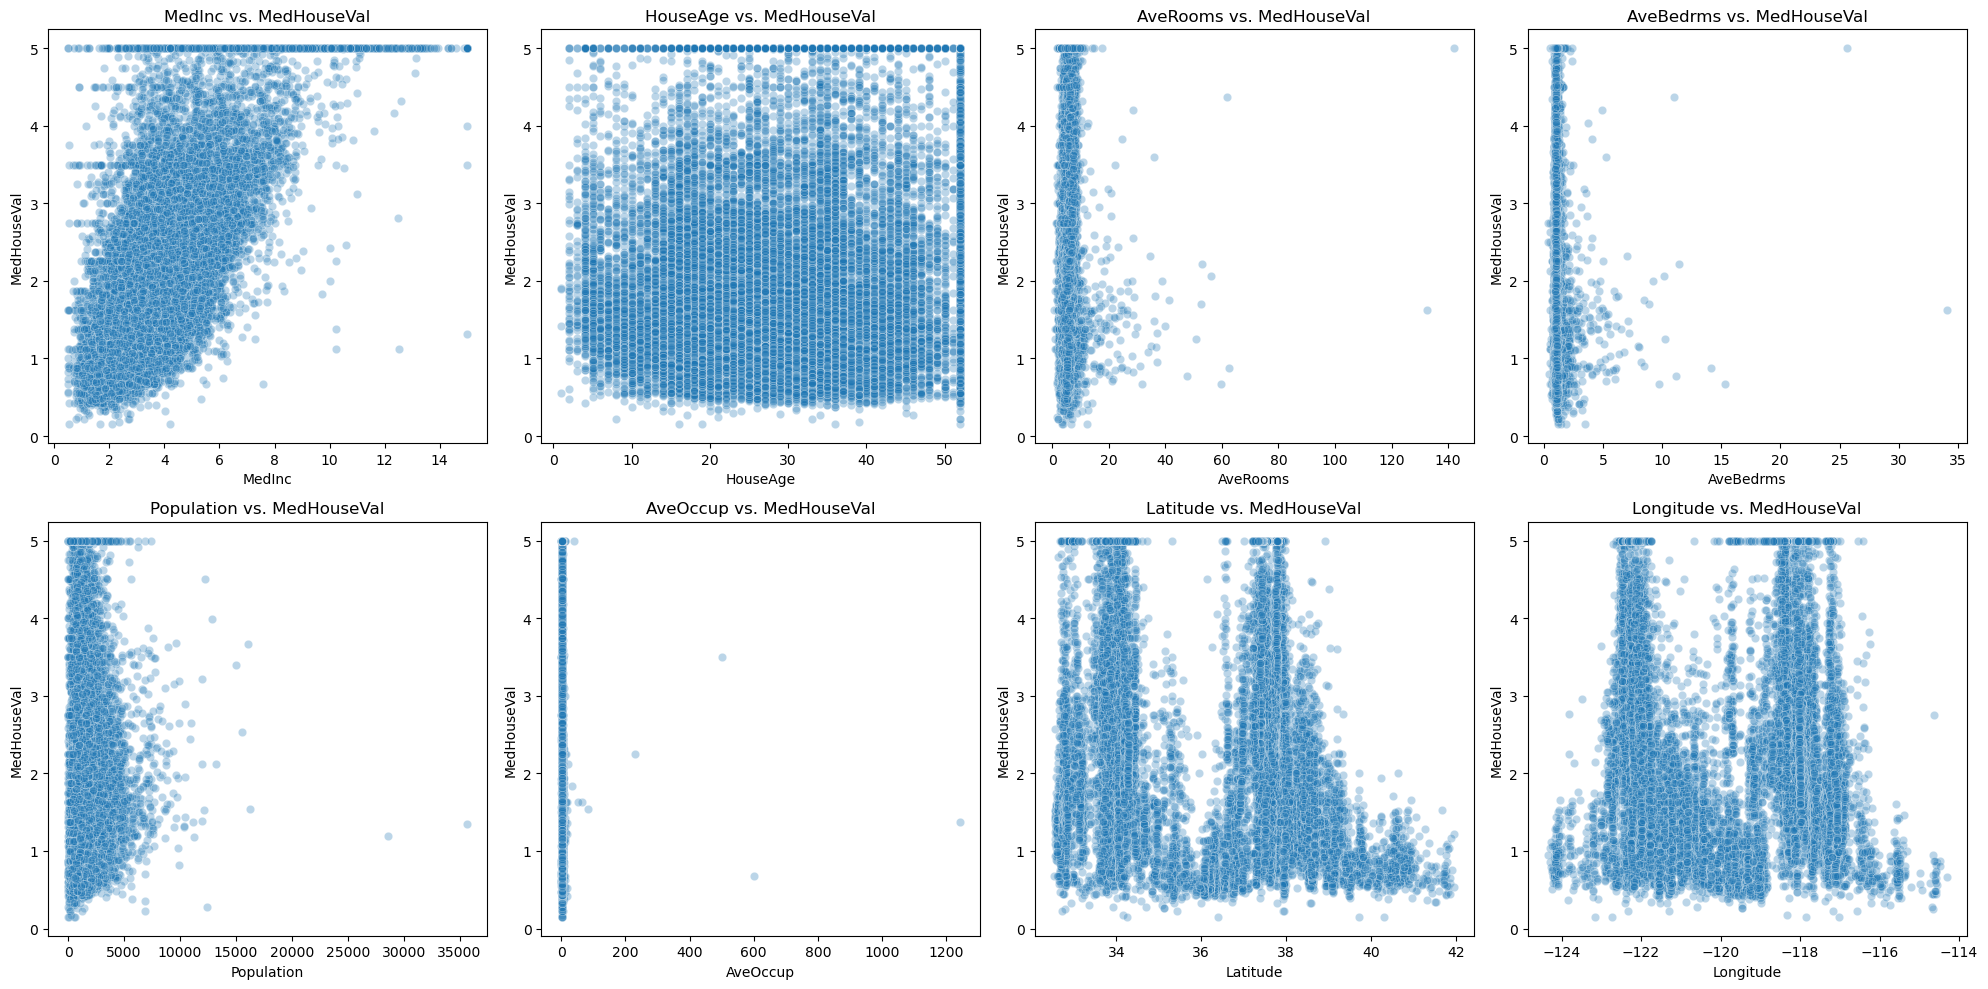

In [14]:
# First, let's define our features (all columns except the target) and the target variable.
# This makes our plotting loop cleaner and more explicit.
features = housing_df.columns.drop('MedHouseVal')
target = 'MedHouseVal'

# Create a figure and a set of subplots. 
# We have 8 features, so a 2x4 grid is a good layout.
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten the 2D array of axes into a 1D array for easy iteration.
axes = axes.flatten()

# Loop through each feature and its corresponding subplot axis.
for i, feature in enumerate(features):
    # Use seaborn's scatterplot function.
    # x: The feature we are currently analyzing.
    # y: Our consistent target variable.
    # data: The DataFrame to pull data from.
    # ax: The specific subplot to draw on.
    # alpha: Sets the transparency of the points. 0.3 means 30% opacity.
    #        This is crucial for dense datasets to reveal areas of high point concentration.
    sns.scatterplot(x=feature, y=target, data=housing_df, ax=axes[i], alpha=0.3)
    
    # Set a clear title for each subplot.
    axes[i].set_title(f'{feature} vs. {target}')

# Adjust the layout to prevent titles and labels from overlapping.
plt.tight_layout()

# Display the entire grid of plots.
plt.show()

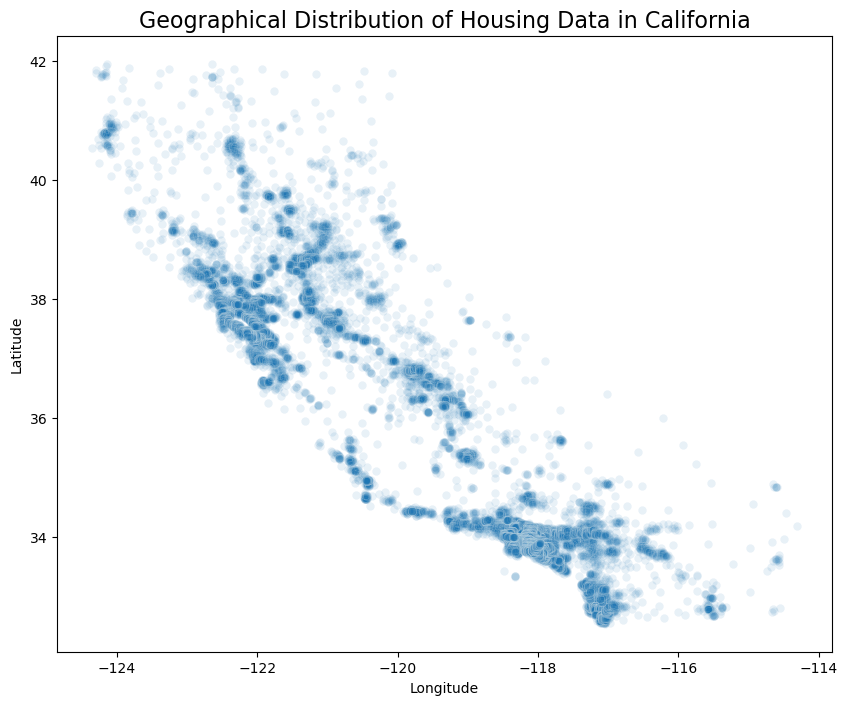

In [15]:
# We'll use seaborn for consistency, but matplotlib's scatter works just as well.
import seaborn as sns
import matplotlib.pyplot as plt

# Set a good figure size to make the plot look like a map.
plt.figure(figsize=(10, 8))

# Create the scatter plot with Longitude on the x-axis and Latitude on the y-axis.
# This is the key part of this task.
sns.scatterplot(
    data=housing_df, 
    x='Longitude', 
    y='Latitude',
    # Here is the crucial parameter for handling overplotting.
    # A low alpha value makes points transparent, so areas with many points become darker.
    # This effectively creates a heat map of data point density.
    alpha=0.1 
)

# Add a descriptive title to the plot.
plt.title('Geographical Distribution of Housing Data in California', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot.
plt.show()

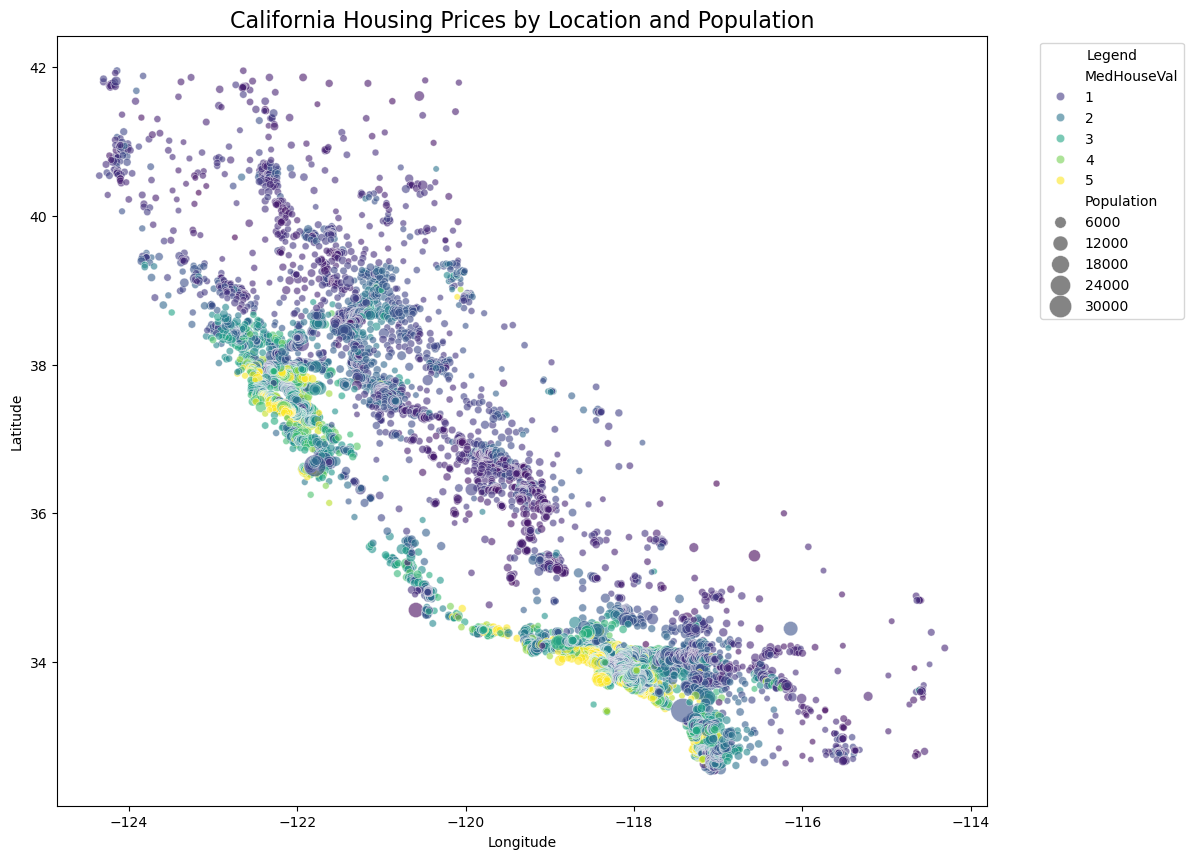

In [16]:
# We'll use our plotting libraries as before
import seaborn as sns
import matplotlib.pyplot as plt

# Set a good figure size for our detailed map
plt.figure(figsize=(12, 10))

# Create the enhanced scatter plot. We are adding new parameters to our previous call.
sns.scatterplot(
    data=housing_df, 
    x='Longitude', 
    y='Latitude',
    
    # --- NEW PARAMETERS ---
    # `hue` will color the points based on the 'MedHouseVal' column.
    hue='MedHouseVal',
    
    # `size` will adjust the size of the points based on the 'Population' column.
    size='Population',
    
    # `palette` specifies the color map. 'viridis' is a good choice for continuous data
    # as it's visually appealing and accessible to colorblind viewers.
    palette='viridis',
    
    # `sizes` controls the minimum and maximum point size for readability.
    sizes=(20, 300),
    
    # We still use `alpha` to handle density, but we can make it a bit less transparent
    # so the colors are more vibrant.
    alpha=0.6
)

# Add a title and labels for clarity
plt.title('California Housing Prices by Location and Population', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# The legend might get crowded, so let's position it nicely.
# 'bbox_to_anchor' places the legend outside the plot area.
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the final, rich plot
plt.show()

In [17]:
# The .corr() method calculates the pairwise correlation of columns, excluding NA/null values.
# By default, it uses the Pearson correlation coefficient.
corr_matrix = housing_df.corr()

# To inspect the results, we can look at the correlations of all features
# with our target variable, 'MedHouseVal'.
# We can select the 'MedHouseVal' column from the matrix and sort the values
# in descending order to see the most impactful relationships first.
print("Correlation with Target Variable (MedHouseVal):")
corr_matrix['MedHouseVal'].sort_values(ascending=False)

Correlation with Target Variable (MedHouseVal):


MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

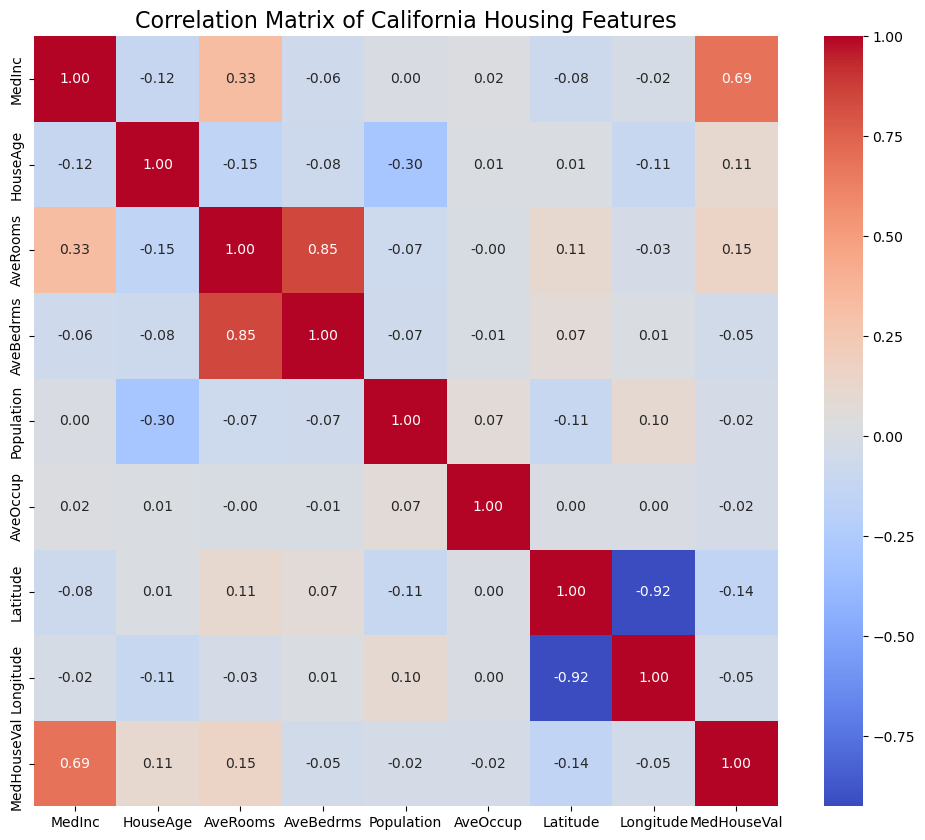

In [18]:
# Import our visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the figure for better readability
plt.figure(figsize=(12, 10))

# Create the heatmap using seaborn.
# - corr_matrix: The correlation matrix we calculated in the previous step.
# - annot=True: This is the key parameter. It displays the correlation coefficient
#               on each cell of the heatmap, making it highly informative.
# - cmap='coolwarm': This specifies the color map. 'coolwarm' is a "diverging" palette,
#                    which is perfect for correlation matrices. It uses a cool color (blue)
#                    for negative correlations, a warm color (red) for positive correlations,
#                    and a neutral color (light gray/white) for correlations near zero.
# - fmt='.2f': This formats the annotations to two decimal places for a cleaner look.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title to the plot for context
plt.title('Correlation Matrix of California Housing Features', fontsize=16)

# Display the plot
plt.show()

In [19]:
# Recalling the correlation matrix calculated previously
corr_matrix = housing_df.corr()

# Sorting the correlations with the target variable to see the most influential features
print("Correlation with Target Variable (MedHouseVal):")
corr_matrix['MedHouseVal'].sort_values(ascending=False)

Correlation with Target Variable (MedHouseVal):


MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

In [20]:
# STEP 3 Data Pre processing: Check for missing values

In [21]:
# The .isnull() method returns a DataFrame of booleans (True for missing, False for not missing).
# Chaining .sum() on this boolean DataFrame counts the number of 'True' values in each column.
# This gives us a clean and simple count of missing values per feature.
missing_values = housing_df.isnull().sum()

# Print the results
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [22]:
# Import the SimpleImputer class from sklearn's impute module
from sklearn.impute import SimpleImputer
import pandas as pd

# --- A Note on Best Practices ---
# In a real machine learning project, you would split your data into training and
# testing sets BEFORE any preprocessing. You would then .fit() the imputer ONLY
# on the training data to prevent "data leakage" from the test set.
# For this educational step, we will apply it to the whole DataFrame to learn the mechanics.

# 1. Instantiate the imputer
# We create an instance of the SimpleImputer, telling it to use the 'median' strategy.
# This aligns with the decision we made in the previous task.
imputer = SimpleImputer(strategy='median')

# 2. Fit and transform the data
# We use .fit_transform() on our DataFrame.
# The imputer will first calculate the median of each column ('fit') and then
# check for and replace any missing values with those medians ('transform').
# The output of a scikit-learn transformer is typically a NumPy array, not a pandas DataFrame.
housing_imputed_np = imputer.fit_transform(housing_df)

# 3. Convert the NumPy array back to a pandas DataFrame
# It's crucial to convert the result back to a DataFrame to retain our column names
# and index, which are essential for further analysis.
# We create a new DataFrame, passing the NumPy array as data and reusing the original
# column names and index from housing_df.
housing_df_imputed = pd.DataFrame(housing_imputed_np, columns=housing_df.columns, index=housing_df.index)

# 4. Verify the result
# Let's look at the head of our new DataFrame. It will be identical to the original
# because there were no missing values to impute. The important thing is that you've
# learned the process.
print("DataFrame after applying the imputer (first 5 rows):")
housing_df_imputed.head()

DataFrame after applying the imputer (first 5 rows):


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
# We are creating a new column called 'rooms_per_person'.
# The value for each row will be the result of dividing the 'AveRooms' value
# by the 'AveOccup' value for that same row.
# Pandas makes this element-wise operation incredibly straightforward.
housing_df_imputed['rooms_per_person'] = housing_df_imputed['AveRooms'] / housing_df_imputed['AveOccup']

# Let's inspect the DataFrame again with .head() to confirm our new column has been added.
# You should see the 'rooms_per_person' column at the far right.
print("DataFrame with the new 'rooms_per_person' feature:")
housing_df_imputed.head()

DataFrame with the new 'rooms_per_person' feature:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,rooms_per_person
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.732919
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.956685
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.957661
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.283154
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.879646


In [24]:
# Using .describe() on the new column to get a statistical summary.
print("\nStatistical summary of the new feature:")
housing_df_imputed[['rooms_per_person']].describe()


Statistical summary of the new feature:


,rooms_per_person
count,20640.000000
mean,1.976970
std,1.146020
min,0.002547
25%,1.522382
50%,1.937936
75%,2.296090
max,55.222222


In [25]:
# We continue to build upon our DataFrame from the previous steps.
# This new feature is calculated by dividing the 'AveBedrms' column by the 'AveRooms' column.
# Pandas performs this division element-wise, creating our new feature Series.
housing_df_imputed['bedrooms_per_room'] = housing_df_imputed['AveBedrms'] / housing_df_imputed['AveRooms']

# Let's verify our work by inspecting the head of the DataFrame and the statistics of our new feature.
print("DataFrame with both new features ('rooms_per_person', 'bedrooms_per_room'):")
display(housing_df_imputed.head())

print("\nStatistical summary of the new 'bedrooms_per_room' feature:")
display(housing_df_imputed[['bedrooms_per_room']].describe())

DataFrame with both new features ('rooms_per_person', 'bedrooms_per_room'):


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,rooms_per_person,bedrooms_per_room
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.732919,0.146591
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2.956685,0.155797
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.957661,0.129516
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,2.283154,0.184458
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,2.879646,0.172096



Statistical summary of the new 'bedrooms_per_room' feature:


,bedrooms_per_room
count,20640.000000
mean,0.213075
std,0.058023
min,0.100000
25%,0.175426
50%,0.203181
75%,0.239834
max,1.000000


In [26]:
# Create the DataFrame of features (X) by dropping the target column.
# The .drop() method is used here.
# - 'MedHouseVal': The name of the column we want to remove.
# - axis=1: This is a crucial argument. It tells pandas to drop a COLUMN. 
#           If you were to use axis=0, it would try to drop a row with the index 'MedHouseVal', which doesn't exist.
X = housing_df_imputed.drop('MedHouseVal', axis=1)

# Create the Series of the target variable (y) by selecting only that column.
# Standard bracket notation is the clearest way to select a single column.
y = housing_df_imputed['MedHouseVal']

# --- Verification Step ---
# It's always a good practice to check the results of your operations.
# Let's look at the first few rows and the shape of our new variables.

print("--- Features (X) ---")
print("Shape of X:", X.shape)
display(X.head())

print("\n--- Target (y) ---")
print("Shape of y:", y.shape)
display(y.head())


--- Features (X) ---
Shape of X: (20640, 10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,rooms_per_person,bedrooms_per_room
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,2.732919,0.146591
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,2.956685,0.155797
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,2.957661,0.129516
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,2.283154,0.184458
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,2.879646,0.172096



--- Target (y) ---
Shape of y: (20640,)


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [27]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets.
# The function returns four DataFrames/Series in a specific order.
# X: The features DataFrame
# y: The target Series
# test_size=0.2: This parameter specifies the proportion of the dataset to allocate to the test set. 
#                0.2 means 20% of the data will be used for testing, and 80% for training.
# random_state=42: This is a crucial parameter for reproducibility. The split involves random shuffling.
#                  Setting a random_state ensures that the same random shuffle is performed every time
#                  you run the code. This means the same data points will end up in the train/test sets,
#                  making your results repeatable and easier to debug. The number 42 is a popular convention.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Verification Step ---
# Let's check the shape of our new datasets to confirm the split was successful.
print("--- Shapes of the Datasets ---")
print("Original X shape:", X.shape)
print("X_train shape:   ", X_train.shape)
print("X_test shape:    ", X_test.shape)
print("\nOriginal y shape:", y.shape)
print("y_train shape:   ", y_train.shape)
print("y_test shape:    ", y_test.shape)

--- Shapes of the Datasets ---
Original X shape: (20640, 10)
X_train shape:    (16512, 10)
X_test shape:     (4128, 10)

Original y shape: (20640,)
y_train shape:    (16512,)
y_test shape:     (4128,)


In [28]:
# Import the StandardScaler class from scikit-learn's preprocessing module.
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler.
# At this point, the scaler object is empty; it has not learned anything about our data yet.
# It is a blank tool, ready to be fitted.
scaler = StandardScaler()

# You can print the object to confirm it has been created.
print("StandardScaler instance created successfully:")
print(scaler)

StandardScaler instance created successfully:
StandardScaler()


In [29]:
# The scaler object was created in the previous task. Now, we fit it to our training data.
# This step calculates the mean and standard deviation for each feature in X_train
# and stores these values inside the 'scaler' object.
scaler.fit(X_train)

# --- Verification Step ---
# Our scaler is no longer empty. We can inspect the parameters it has learned.
# The learned means are stored in the `mean_` attribute.
# The learned standard deviations are stored in the `scale_` attribute.
# Let's print them to see what the scaler has learned about our training data.

print("Scaler has been fitted successfully.")
print("\nLearned Means (one for each of our 10 features):")
print(scaler.mean_)

print("\nLearned Standard Deviations (one for each of our 10 features):")
print(scaler.scale_)

Scaler has been fitted successfully.

Learned Means (one for each of our 10 features):
[ 3.88075426e+00  2.86082849e+01  5.43523502e+00  1.09668475e+00
  1.42645300e+03  3.09696119e+00  3.56431492e+01 -1.19582290e+02
  1.98058241e+00  2.12857974e-01]

Learned Standard Deviations (one for each of our 10 features):
[1.90423626e+00 1.26021177e+01 2.38730258e+00 4.33201426e-01
 1.13702195e+03 1.15783935e+01 2.13660060e+00 2.00559281e+00
 1.12578341e+00 5.79936352e-02]


In [30]:
# The scaler object is already fitted from the previous step.

# 1. Transform the training data
# We use the .transform() method on X_train.
# The scaler applies the means and std devs it learned from X_train to X_train itself.
X_train_scaled_np = scaler.transform(X_train)

# 2. Transform the testing data
# We apply the SAME fitted scaler to X_test.
# It uses the parameters learned from X_train to transform X_test.
X_test_scaled_np = scaler.transform(X_test)

# 3. Convert the scaled NumPy arrays back to pandas DataFrames
# This makes the data easier to inspect and work with.
# We must provide the original column names and index to the new DataFrame.
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled_np, columns=X.columns, index=X_test.index)

# --- Verification Step ---
# Let's inspect the results to see the transformation in action.

print("--- Scaled Training Data (X_train_scaled) ---")
display(X_train_scaled.head())

print("\n--- Statistical Summary of Scaled Training Data ---")
# The mean of each column should be very close to 0, and the std dev should be very close to 1.
display(X_train_scaled.describe())

--- Scaled Training Data (X_train_scaled) ---


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,rooms_per_person,bedrooms_per_room
14196,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587,-0.552017,-0.211785
8267,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162,0.526956,0.342185
17445,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603,0.082291,-0.661658
14265,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698,-0.869143,0.783032
2271,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551,0.661600,-0.550364



--- Statistical Summary of Scaled Training Data ---


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,rooms_per_person,bedrooms_per_room
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-6.519333e-17,-9.251859e-18,-1.981081e-16,-1.707291e-16,-2.151595e-19,4.936566e-17,6.400995e-17,1.753335e-15,1.527632e-17,-5.927644e-17
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-1.775438e+00,-2.190766e+00,-1.904386e+00,-1.762117e+00,-1.251913e+00,-2.076846e-01,-1.447697e+00,-2.377207e+00,-1.757030e+00,-1.946041e+00
25%,-6.900689e-01,-8.417859e-01,-4.118373e-01,-2.081645e-01,-5.606339e-01,-5.770769e-02,-8.018107e-01,-1.110749e+00,-4.035763e-01,-6.497310e-01
50%,-1.758995e-01,3.108328e-02,-8.350905e-02,-1.094160e-01,-2.281865e-01,-2.415892e-02,-6.473597e-01,5.346501e-01,-3.467976e-02,-1.733004e-01
75%,4.686502e-01,6.658972e-01,2.621376e-01,8.455177e-03,2.634487e-01,1.580865e-02,9.720351e-01,7.839530e-01,2.842758e-01,4.594195e-01
max,5.839268e+00,1.856173e+00,5.716655e+01,5.664727e+01,3.012743e+01,1.071164e+02,2.951816e+00,2.628794e+00,4.446037e+01,1.357290e+01


In [31]:
# STEP 4 Baseline Model Training

In [32]:
# Import the LinearRegression class from the sklearn.linear_model module.
# This makes the "blueprint" for a Linear Regression model available in our notebook.
from sklearn.linear_model import LinearRegression

In [33]:
# Create an instance of the LinearRegression model.
# We call the LinearRegression class (the blueprint) to create an actual model object (the car).
# This object is stored in a variable, which we'll conventionally name 'lin_reg_model'.
# We are using the default parameters for now, creating a standard Linear Regression model.
lin_reg_model = LinearRegression()

# Let's print our new model object to confirm it has been created.
# The output will show that it's a LinearRegression object, and it also lists the
# default parameters it was created with (e.g., fit_intercept=True, n_jobs=None).
print("Linear Regression model instance created successfully:")
print(lin_reg_model)

Linear Regression model instance created successfully:
LinearRegression()


In [34]:
# The .fit() method is where the model learns from the data.
# We pass it two arguments:
# 1. X_train_scaled: The features of our training set, which have been scaled.
# 2. y_train: The target variable (actual house prices) for our training set.

# The method will modify the `lin_reg_model` object in-place, filling it with the
# learned parameters (coefficients and intercept).
lin_reg_model.fit(X_train_scaled, y_train)

# --- Verification Step ---
# Our model is no longer empty. It has learned! We can now inspect the
# knowledge it has gained.

# The learned intercept is stored in the .intercept_ attribute.
print(f"Learned Intercept (b): {lin_reg_model.intercept_}")

# The learned coefficients (weights) are stored in the .coef_ attribute.
# This will be an array of 10 values, one for each of our features.
print(f"Learned Coefficients (w): {lin_reg_model.coef_}")

Learned Intercept (b): 2.0719469373788773
Learned Coefficients (w): [ 0.79012123  0.12842294 -0.14690057 -0.22545214  0.03227174 -0.01783871
 -0.88631613 -0.83447052  0.51954145  0.2414413 ]


In [35]:
# Create a pandas Series to display the coefficients alongside their feature names for clarity.
# This makes it much easier to see which features the model found to be most influential.
feature_weights = pd.Series(lin_reg_model.coef_, index=X.columns)
print("\n--- Interpreted Feature Weights ---")
print(feature_weights.sort_values(ascending=False))


--- Interpreted Feature Weights ---
MedInc               0.790121
rooms_per_person     0.519541
bedrooms_per_room    0.241441
HouseAge             0.128423
Population           0.032272
AveOccup            -0.017839
AveRooms            -0.146901
AveBedrms           -0.225452
Longitude           -0.834471
Latitude            -0.886316
dtype: float64


In [36]:
# Use the trained 'lin_reg_model' to make predictions on the test set.
# The .predict() method takes the features of the test set (X_test_scaled) as input.
# It applies the learned formula (weights and intercept) to this new data.
# The result is a NumPy array containing the model's price predictions for each district in the test set.
predictions = lin_reg_model.predict(X_test_scaled)

In [37]:
import pandas as pd

# To make the comparison intuitive, let's create a new DataFrame.
# This DataFrame will have two columns: one for our model's predictions
# and one for the actual, true values from the test set.

# We can directly use the 'predictions' NumPy array for the first column.
# For the 'y_test' Series, using .values extracts its underlying NumPy array,
# which ensures clean alignment when creating the DataFrame.
comparison_df = pd.DataFrame({
    'Predicted Price ($100k)': predictions,
    'Actual Price ($100k)': y_test.values
})

# Let's also add a column for the difference (the error) to see how far off
# each prediction was.
comparison_df['Error'] = comparison_df['Actual Price ($100k)'] - comparison_df['Predicted Price ($100k)']

# Display the first 15 rows of this DataFrame to see how our model performed
# on a sample of the test data.
print("Comparison of Predicted vs. Actual Prices (First 15 Samples):")
display(comparison_df.head(15))

# Let's also look at a statistical summary of our predictions.
# This tells us the range and average of the values our model is outputting.
print("\nStatistical Summary of Model Predictions:")
display(pd.Series(predictions).describe())


Comparison of Predicted vs. Actual Prices (First 15 Samples):


,Predicted Price ($100k),Actual Price ($100k),Error
0,0.538489,0.47700,-0.061489
1,1.716224,0.45800,-1.258224
2,3.271458,5.00001,1.728552
3,2.647866,2.18600,-0.461866
4,2.656293,2.78000,0.123707
5,2.003236,1.58700,-0.416236
6,2.534438,1.98200,-0.552438
7,1.908619,1.57500,-0.333619
8,2.940655,3.40000,0.459345
9,3.934943,4.46600,0.531057



Statistical Summary of Model Predictions:


count    4128.000000
mean        2.048025
std         0.931145
min        -0.869577
25%         1.459152
50%         1.996856
75%         2.570539
max         7.709800
dtype: float64

In [38]:
# STEP 5 Train Advanced Models

In [39]:
# Import the DecisionTreeRegressor class from the sklearn.tree module.
# This class provides the blueprint for creating a decision tree model for regression tasks.
from sklearn.tree import DecisionTreeRegressor

In [41]:
# The DecisionTreeRegressor class was imported in the previous step.

# 1. Create an instance of the DecisionTreeRegressor model.
# We'll name it 'tree_reg_model'.
# It is critical to set 'random_state' for reproducibility. This ensures that
# the same sequence of "random" splits is chosen every time we run the code,
# leading to the exact same tree structure. The number 42 is a convention.
tree_reg_model = DecisionTreeRegressor(random_state=42)

# 2. Train the model using the .fit() method.
# This is the "learning" or "tree growing" phase. The model will recursively
# find the best splits in the training data (X_train_scaled) to minimize
tree_reg_model.fit(X_train_scaled, y_train)

# --- Verification Step ---
# After fitting, our 'tree_reg_model' is no longer an empty object.
# It is now a fully grown tree, containing a complex set of rules.
# Unlike Linear Regression, it doesn't have a simple '.coef_' attribute.
# Its "knowledge" is stored in its tree structure.
print("Decision Tree Regressor model has been successfully trained.")
print("Model instance:")
print(tree_reg_model)

Decision Tree Regressor model has been successfully trained.
Model instance:
DecisionTreeRegressor(random_state=42)


In [42]:
# Use the trained 'tree_reg_model' to make predictions on the test set.
# The .predict() method takes our unseen test features (X_test_scaled) as input.
# For each row in X_test_scaled, it runs the data down the decision tree to a leaf node
# and returns the prediction associated with that leaf.
tree_predictions = tree_reg_model.predict(X_test_scaled)

# Let's verify the output by checking the number of predictions made.
# The length of this array should be equal to the number of rows in our test set (4128).
print(f"Successfully generated {len(tree_predictions)} predictions with the Decision Tree model.")

# We can also look at the first 5 predictions to get a sense of the output.
print("First 5 predictions:")
print(tree_predictions[:5])

Successfully generated 4128 predictions with the Decision Tree model.
First 5 predictions:
[0.476 0.521 5.    1.83  2.43 ]


In [43]:
# Import the RandomForestRegressor class from the sklearn.ensemble module.
# This class provides the blueprint for creating a Random Forest model for regression tasks.
from sklearn.ensemble import RandomForestRegressor

In [44]:
# The RandomForestRegressor class was imported in the previous task.

# 1. Create an instance of the RandomForestRegressor model.
# We'll name it 'forest_reg_model'.
# - n_estimators=100: This is the number of trees in the forest. More trees generally lead to
#   better performance, up to a point, but increase training time. 100 is a solid default.
# - random_state=42: This is absolutely critical for reproducibility. It ensures that the same
#   random bootstrap samples are generated and the same random feature subsets are chosen
#   for each tree every time the code is run.
# - n_jobs=-1: This is a powerful optimization. It tells scikit-learn to use all available CPU
#   cores on your machine to train the trees in parallel. This can dramatically reduce
#   the training time.
forest_reg_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the model using the .fit() method.
# This kicks off the entire process of bootstrapping and tree-growing. The model learns
# by building a forest of 100 diverse trees on our training data.
# This may take a few seconds to run, depending on your computer's CPU.
forest_reg_model.fit(X_train_scaled, y_train)

# --- Verification Step ---\n# Our 'forest_reg_model' is now a fully trained ensemble. Its 'knowledge' is distributed
# across the 100 trees it contains.
print("Random Forest Regressor model has been successfully trained.")
print("Model instance:")
print(forest_reg_model)

Random Forest Regressor model has been successfully trained.
Model instance:
RandomForestRegressor(n_jobs=-1, random_state=42)


In [45]:
# Use the trained 'forest_reg_model' to make predictions on the test set.
# The .predict() method takes our unseen test features (X_test_scaled) as input.
# It internally gathers a prediction from all 100 trees and averages them to get the final result.
forest_predictions = forest_reg_model.predict(X_test_scaled)

# Let's verify our output.
# The number of predictions should match the number of samples in our test set (4128).
print(f"Successfully generated {len(forest_predictions)} predictions with the Random Forest model.")

# Let's also inspect the first 5 predictions to see the output.
print("First 5 predictions:")
print(forest_predictions[:5])

Successfully generated 4128 predictions with the Random Forest model.
First 5 predictions:
[0.49279   0.81716   4.9636277 2.51081   2.27617  ]


In [46]:
# STEP 6 Evaluate & Compare Models

In [47]:
# Import the necessary functions for model evaluation from scikit-learn's metrics module.
# mean_squared_error will calculate the average of the squared differences between actual and predicted values.
# r2_score will calculate the R-squared (coefficient of determination) metric.
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# The mean_squared_error function was imported in the previous step.

# Calculate the Mean Squared Error (MSE) for the Linear Regression model.
# The function takes two main arguments:
# 1. y_true: The actual, ground-truth values. In our case, this is our test set target, y_test.
# 2. y_pred: The model's predicted values. For our linear model, this is the 'predictions' array.
lin_reg_mse = mean_squared_error(y_test, predictions)

# Print the result. We use an f-string for clear, formatted output.
# The '.4f' formatting will display the number with 4 decimal places for readability.
print(f"Linear Regression Mean Squared Error (MSE): {lin_reg_mse:.4f}")

Linear Regression Mean Squared Error (MSE): 0.4561


In [49]:
import numpy as np # Ensure numpy is imported, it's usually aliased as np

# Calculate the Root Mean Squared Error (RMSE) by taking the square root of the MSE.
# We use the np.sqrt() function from the NumPy library for this operation.
# The input is the lin_reg_mse variable we calculated in the previous task.
lin_reg_rmse = np.sqrt(lin_reg_mse)

# Print the result using a formatted f-string for clarity.
# An RMSE value is much more interpretable than an MSE value.
print(f"Linear Regression Root Mean Squared Error (RMSE): {lin_reg_rmse:.4f}")

Linear Regression Root Mean Squared Error (RMSE): 0.6753


In [50]:
# The r2_score function was imported in a previous step.

# Calculate the R-squared score for the Linear Regression model.
# The function compares our model's predictions ('predictions') against the true values ('y_test')
# to determine the proportion of variance explained by the model.
lin_reg_r2 = r2_score(y_test, predictions)

# Print the result. R-squared is often expressed as a percentage, but we'll show it as a decimal.
# A value of 0.59 means the model explains 59% of the variance.
print(f"Linear Regression R-squared (R²): {lin_reg_r2:.4f}")

Linear Regression R-squared (R²): 0.6519


In [51]:
# The metric functions (mean_squared_error, r2_score) and numpy (for sqrt) are already imported.

# --- Step 1: Calculate Mean Squared Error (MSE) for the Decision Tree ---
# We use the same function as before, but this time we pass the tree's predictions.
tree_mse = mean_squared_error(y_test, tree_predictions)

# --- Step 2: Calculate Root Mean Squared Error (RMSE) for the Decision Tree ---
# As before, we take the square root of the MSE to get an interpretable error in dollars.
tree_rmse = np.sqrt(tree_mse)

# --- Step 3: Calculate R-squared (R²) for the Decision Tree ---
# This will tell us the proportion of variance explained by our tree model on the test set.
tree_r2 = r2_score(y_test, tree_predictions)

# --- Step 4: Print all the results for a clear comparison ---
print("--- Decision Tree Regressor Evaluation ---")
print(f"Mean Squared Error (MSE): {tree_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {tree_rmse:.4f}")
print(f"R-squared (R²): {tree_r2:.4f}")

--- Decision Tree Regressor Evaluation ---
Mean Squared Error (MSE): 0.5145
Root Mean Squared Error (RMSE): 0.7173
R-squared (R²): 0.6074


In [52]:
# The metric functions (mean_squared_error, r2_score) and numpy (for sqrt) are already imported.

# --- Step 1: Calculate Mean Squared Error (MSE) for the Random Forest ---
# We apply the same function, this time using the Random Forest's predictions.
forest_mse = mean_squared_error(y_test, forest_predictions)

# --- Step 2: Calculate Root Mean Squared Error (RMSE) for the Random Forest ---
# We take the square root of the MSE to get the average error in the original units.
forest_rmse = np.sqrt(forest_mse)

# --- Step 3: Calculate R-squared (R²) for the Random Forest ---
# This will tell us the proportion of price variance explained by our most advanced model.
forest_r2 = r2_score(y_test, forest_predictions)

# --- Step 4: Print all the results for a clear, final evaluation ---
print("--- Random Forest Regressor Evaluation ---")
print(f"Mean Squared Error (MSE): {forest_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {forest_rmse:.4f}")
print(f"R-squared (R²): {forest_r2:.4f}")

--- Random Forest Regressor Evaluation ---
Mean Squared Error (MSE): 0.2549
Root Mean Squared Error (RMSE): 0.5048
R-squared (R²): 0.8055


In [53]:
# Create a dictionary to hold the results.
# The keys will be the column names in our DataFrame.
# The values are lists containing the metrics for each model in a consistent order.
model_performance_data = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'RMSE': [lin_reg_rmse, tree_rmse, forest_rmse],
    'R-squared': [lin_reg_r2, tree_r2, tree_r2]
}

# Create a pandas DataFrame from the dictionary.
# This structure is highly readable and perfect for comparison.
results_df = pd.DataFrame(model_performance_data)

# To make the numbers more readable, we can round the values to 4 decimal places.
results_df['RMSE'] = results_df['RMSE'].round(4)
results_df['R-squared'] = results_df['R-squared'].round(4)

# Display the final results DataFrame.
# The conclusion is now crystal clear from this single table.
print("--- Model Performance Comparison ---")
display(results_df)

--- Model Performance Comparison ---


,Model,RMSE,R-squared
0,Linear Regression,0.6753,0.6519
1,Decision Tree,0.7173,0.6074
2,Random Forest,0.5048,0.6074


In [54]:
# STEP 7 Optimize Best Model

In [55]:
# Import the GridSearchCV class from the sklearn.model_selection module.
# This class provides a framework to systematically work through different hyperparameter combinations,
# evaluating each one using cross-validation to find the one that produces the best model performance.
from sklearn.model_selection import GridSearchCV

In [56]:
# We have already imported RandomForestRegressor in a previous step.

# Based on our evaluation, the Random Forest model is the clear winner.
# We will now create a NEW, untuned instance of this model. This instance will be the
# 'estimator' that we pass to GridSearchCV for tuning.
# It is crucial that this is a "fresh" model, not the 'forest_reg_model' that we have already fitted.
#
# We still include 'random_state=42' to ensure that even with the same hyperparameters,
# the training process (e.g., bootstrap sampling) is reproducible.
# We also keep 'n_jobs=-1' to leverage parallel processing during the grid search.
rf_for_tuning = RandomForestRegressor(random_state=42, n_jobs=-1)

# This 'rf_for_tuning' object is now officially our candidate for hyperparameter optimization.
# It's an empty blueprint, ready for GridSearchCV to work with.
print("Selected RandomForestRegressor as the model for hyperparameter tuning.")
print("Model instance ready for tuning:")
print(rf_for_tuning)

Selected RandomForestRegressor as the model for hyperparameter tuning.
Model instance ready for tuning:
RandomForestRegressor(n_jobs=-1, random_state=42)


In [57]:
# Define the parameter grid to search over.
# This is a dictionary where keys are the hyperparameter names
# and values are the list of settings to test for that hyperparameter.

param_grid = {
    # n_estimators: The number of trees in the forest. We will test our baseline of 100
    # and see if doubling the trees to 200 provides a significant benefit.
    'n_estimators': [100, 200],

    # max_depth: The maximum depth of each tree. This controls the complexity of individual trees.
    # We test a moderate depth (10), a deeper depth (20), and an unconstrained depth (None).
    'max_depth': [10, 20, None],

    # max_features: The number of features to consider when looking for the best split.
    # 'sqrt' is a classic choice that takes the square root of the total number of features.
    # 1.0 means all features are considered at each split, which is the default.
    'max_features': ['sqrt', 1.0]
}

# --- A Note on Computational Cost ---
# GridSearchCV will test every combination. Let's calculate how many models it will train.
# Number of combinations = (2 n_estimators) * (3 max_depth) * (2 max_features) = 12 combinations.
# If we use 5-fold cross-validation (cv=5), the total number of fits will be 12 * 5 = 60.
# This is a reasonable number, but it's important to be aware of before starting the search.

print("Parameter grid defined:")
print(param_grid)

Parameter grid defined:
{'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'max_features': ['sqrt', 1.0]}


In [58]:
# The GridSearchCV class and our rf_for_tuning model and param_grid are already defined.

# Instantiate the GridSearchCV object.
# This object encapsulates the entire tuning process.
grid_search = GridSearchCV(
    # 1. estimator: The model blueprint to tune. We pass our untuned Random Forest instance.
    estimator=rf_for_tuning, 
    
    # 2. param_grid: The dictionary of hyperparameters and values to test.
    param_grid=param_grid, 
    
    # 3. cv: The cross-validation strategy. cv=5 means 5-fold cross-validation will be used.
    # This will train each model combination 5 times for a robust performance estimate.
    cv=5, 
    
    # 4. scoring: The metric to use for evaluating performance. We use 'neg_mean_squared_error'
    # because GridSearchCV maximizes a score, and maximizing negative MSE is the same as minimizing MSE.
    scoring='neg_mean_squared_error',
    
    # 5. n_jobs: Just like in RandomForestRegressor, n_jobs=-1 tells GridSearchCV to use all
    # available CPU cores. This can dramatically speed up the cross-validation process by
    # running the folds in parallel.
    n_jobs=-1
)

# The 'grid_search' object is now ready. It's an untrained 'meta-estimator' that contains all
# the instructions for our search. It behaves like any other scikit-learn model.
print("GridSearchCV object has been successfully instantiated and is ready for fitting.")
print(grid_search)

GridSearchCV object has been successfully instantiated and is ready for fitting.
GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 1.0],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')


In [59]:
# The grid_search object is already instantiated.

# This is the most computationally intensive step. 
# Calling .fit() on the GridSearchCV object kicks off the entire process of
# iterating through every parameter combination and evaluating each one using 5-fold cross-validation.
print("Starting GridSearchCV... This may take a few minutes.")

grid_search.fit(X_train_scaled, y_train)

# Once this command completes, the 'grid_search' object will be "fitted".
# It will contain a wealth of information about the search, including the best parameters,
# the best score, and a fully trained model built with those best parameters.
print("GridSearchCV has completed.")

Starting GridSearchCV... This may take a few minutes.
GridSearchCV has completed.


In [60]:
# The grid_search object has been fitted in the previous step and now contains the results.

# Access the .best_params_ attribute to get the combination of hyperparameters
# that yielded the best performance during cross-validation.
best_parameters = grid_search.best_params_

# Print the results in a user-friendly format.
print("The best combination of hyperparameters found by GridSearchCV is:")
print(best_parameters)

The best combination of hyperparameters found by GridSearchCV is:
{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}


In [61]:
# Access the .best_score_ attribute to see the mean cross-validated score of the best_estimator.
best_score = grid_search.best_score_

# Remember, this score is the 'neg_mean_squared_error'.
print(f"\nBest cross-validation score (Negative MSE): {best_score:.4f}")

# To make it more interpretable, let's convert it to an RMSE score.
# We take the absolute value (to remove the negative) and then the square root.
best_rmse = np.sqrt(-best_score)
print(f"Equivalent RMSE from cross-validation: {best_rmse:.4f}")


Best cross-validation score (Negative MSE): -0.2585
Equivalent RMSE from cross-validation: 0.5084


In [62]:
# Access the .best_estimator_ attribute from the fitted grid_search object.
# This attribute holds the final model that was automatically re-trained by GridSearchCV
# on the entire training set using the best parameters it found.
final_model = grid_search.best_estimator_

# Let's print the final model. You will see that its parameters match the .best_params_
# that you found in the previous step. This confirms we have the correct, tuned model.
print("The final, tuned model object is:")
print(final_model)

The final, tuned model object is:
RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                      n_jobs=-1, random_state=42)


In [63]:
# The final_model, metric functions, and numpy are all available from previous steps.

# --- Step 1: Make predictions on the test set using the tuned model ---
# We use the .predict() method of our new champion model, 'final_model', on the unseen test features.
tuned_predictions = final_model.predict(X_test_scaled)

# --- Step 2: Calculate the evaluation metrics for the tuned model ---
# Calculate the Root Mean Squared Error (RMSE).
tuned_rmse = np.sqrt(mean_squared_error(y_test, tuned_predictions))

# Calculate the R-squared (R²) score.
tuned_r2 = r2_score(y_test, tuned_predictions)

# --- Step 3: Print the performance of the new, tuned model ---
print("--- Tuned Random Forest Regressor Evaluation ---")
print(f"Root Mean Squared Error (RMSE): {tuned_rmse:.4f}")
print(f"R-squared (R²): {tuned_r2:.4f}\n")

# --- Step 4: Compare the results with the default model ---
# To make the comparison crystal clear, let's create a final comparison DataFrame.
# We'll use the 'forest_rmse' and 'forest_r2' variables we calculated in the previous step.
comparison_data = {
    'Model': ['Default Random Forest', 'Tuned Random Forest'],
    'RMSE': [forest_rmse, tuned_rmse],
    'R-squared': [forest_r2, tuned_r2]
}

final_comparison_df = pd.DataFrame(comparison_data)

# Round the values for better readability.
final_comparison_df['RMSE'] = final_comparison_df['RMSE'].round(4)
final_comparison_df['R-squared'] = final_comparison_df['R-squared'].round(4)

print("--- Final Performance Comparison ---")
display(final_comparison_df)

--- Tuned Random Forest Regressor Evaluation ---
Root Mean Squared Error (RMSE): 0.5075
R-squared (R²): 0.8034

--- Final Performance Comparison ---


,Model,RMSE,R-squared
0,Default Random Forest,0.5048,0.8055
1,Tuned Random Forest,0.5075,0.8034


In [64]:
# STEP 8 Finalize & Analyze

In [65]:
# In the previous step, we assigned the best estimator from GridSearchCV to 'final_model'.
# We are now formally declaring this as the champion model for our project.
# This is the model we will analyze, save, and potentially deploy.

print("--- Final Model Declaration ---")
print("The following model has been selected as the final, optimized model for the project:")
print(final_model)

--- Final Model Declaration ---
The following model has been selected as the final, optimized model for the project:
RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                      n_jobs=-1, random_state=42)


In [66]:
# Our 'final_model' is the trained, tuned RandomForestRegressor from the previous steps.

# Access the .feature_importances_ attribute of the final model.
# This attribute is a NumPy array where each value corresponds to the importance
# of a feature at the same index. The scores are normalized to sum to 1.0.
feature_importances = final_model.feature_importances_

# Print the raw feature importances.
# At this stage, it's just an array of numbers without labels.
print("Raw feature importance scores:")
print(feature_importances)

Raw feature importance scores:
[0.33410096 0.05188225 0.04931005 0.02904624 0.02651505 0.08105759
 0.11267583 0.10215057 0.11177012 0.10149134]


In [67]:
# We assume 'pandas' is already imported as 'pd'.
# 'final_model' holds your tuned RandomForestRegressor.
# 'feature_importances' holds the array of scores from the previous task.
# 'X' is the original DataFrame of features (before splitting and scaling).

# Get the names of all the features from the original DataFrame's columns.
# It's crucial to use the column order from the data the model was originally based on.
feature_names = X.columns

# Create a pandas Series to map the importance scores to the feature names.
# The constructor pd.Series() takes the data as the first argument and the index as the second.
#   - Data: Our array of importance scores (feature_importances).
#   - Index: Our list of feature names (feature_names).
feature_importances_series = pd.Series(feature_importances, index=feature_names)

# Display the new Series. Using display() in a Jupyter environment provides a clean, formatted output.
# Now each score is clearly labeled with the feature it belongs to.
print("Feature Importances with their corresponding names:")
display(feature_importances_series)

Feature Importances with their corresponding names:


MedInc               0.334101
HouseAge             0.051882
AveRooms             0.049310
AveBedrms            0.029046
Population           0.026515
AveOccup             0.081058
Latitude             0.112676
Longitude            0.102151
rooms_per_person     0.111770
bedrooms_per_room    0.101491
dtype: float64

In [68]:
# Our 'feature_importances_series' from the previous task is ready to be sorted.

# Use the .sort_values() method to sort the Series.
# We pass ascending=False to sort from highest importance to lowest.
# It's a best practice to store the result in a new variable to preserve the original, unsorted Series.
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

# Display the newly sorted Series. The results are now much clearer.
print("Feature Importances, sorted in descending order:")
display(sorted_feature_importances)

Feature Importances, sorted in descending order:


MedInc               0.334101
Latitude             0.112676
rooms_per_person     0.111770
Longitude            0.102151
bedrooms_per_room    0.101491
AveOccup             0.081058
HouseAge             0.051882
AveRooms             0.049310
AveBedrms            0.029046
Population           0.026515
dtype: float64

C:\Users\drrak\AppData\Local\Temp\ipykernel_43808\3164179621.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importances.index, y=sorted_feature_importances.values, palette='viridis')


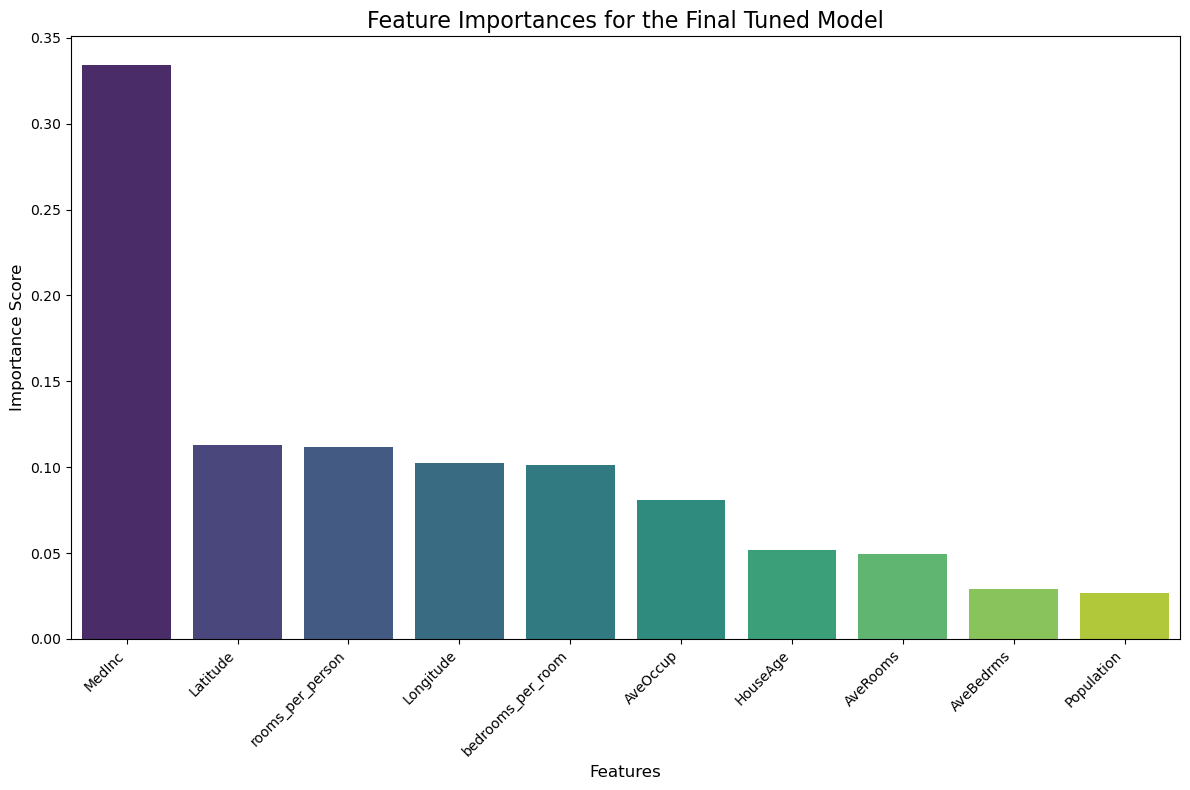

In [69]:
# Import the necessary libraries for plotting.
import matplotlib.pyplot as plt
import seaborn as sns

# Set a figure size for better readability of the plot.
# A wider figure helps accommodate all the feature names on the x-axis.
plt.figure(figsize=(12, 8))

# Create the bar plot using Seaborn.
# - x: The feature names, which are the index of our sorted Series.
# - y: The importance scores, which are the values of our sorted Series.
# - palette: A color scheme for the bars to make the plot visually appealing. 'viridis' is a popular choice.
sns.barplot(x=sorted_feature_importances.index, y=sorted_feature_importances.values, palette='viridis')

# Add a descriptive title to the plot.
plt.title('Feature Importances for the Final Tuned Model', fontsize=16)

# Label the x-axis and y-axis.
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance Score', fontsize=12)

# Rotate the feature names on the x-axis to prevent them from overlapping.
# rotation=45 rotates the labels, and ha='right' aligns them nicely with the bars.
plt.xticks(rotation=45, ha='right')

# Use plt.tight_layout() to ensure all plot elements (like labels) fit neatly into the figure area.
plt.tight_layout()

# Finally, display the plot.
plt.show()

In [70]:
# STEP 9 Save Model

In [71]:
# Import the joblib library.
# Joblib is the recommended tool for saving and loading scikit-learn models,
# as it is more efficient at handling large NumPy arrays that make up our trained model and scaler.
import joblib

print("joblib library imported successfully.")

joblib library imported successfully.


In [72]:
# Specify the filename for the final, trained model.
# Using a clear and descriptive name is a best practice.
# The '.joblib' extension is a convention that tells us this file was created using the joblib library
# and is intended to be loaded back with it.
# We store this name in a variable to make our code cleaner and easier to maintain.
model_filename = 'final_model.joblib'

# Print the filename to confirm it has been set.
print(f"Filename for the final model has been set to: '{model_filename}'")

Filename for the final model has been set to: 'final_model.joblib'


In [73]:
# The 'final_model' object and the 'model_filename' variable are already defined.
# The 'joblib' library has been imported.

# Use the joblib.dump() function to serialize and save the model.
# The first argument is the Python object we want to save (our final, tuned model).
# The second argument is the string containing the path and filename for the output file.
joblib.dump(final_model, model_filename)

# It's always a good practice to print a confirmation message after a file operation.
# This lets the user know that the process completed successfully.
print(f"Final model has been successfully saved to the file: '{model_filename}'")

Final model has been successfully saved to the file: 'final_model.joblib'


In [74]:
# In the Data Preprocessing step, you created and fitted a StandardScaler object, likely named 'scaler'.

# Specify the filename for the fitted scaler object.
# It is just as important as the model itself for creating a reproducible prediction pipeline.
# We will follow the same naming conventions as we did for the model file.
scaler_filename = 'scaler.joblib'

# Print a confirmation message.
print(f"Filename for the fitted scaler has been set to: '{scaler_filename}'")

Filename for the fitted scaler has been set to: 'scaler.joblib'


In [75]:
# We assume the StandardScaler object, fitted on the training data, is named 'scaler'.
# This object was created during the "Data Preprocessing and Feature Engineering" step.
# The 'scaler_filename' variable and 'joblib' library are already available.

# Use joblib.dump() to serialize and save the fitted scaler object.
# The first argument is the scaler object itself.
# The second argument is the filename we defined for it.
joblib.dump(scaler, scaler_filename)

# Print a confirmation message to verify that the operation was successful.
print(f"Fitted scaler has been successfully saved to the file: '{scaler_filename}'")

Fitted scaler has been successfully saved to the file: 'scaler.joblib'


In [76]:
# The joblib library and numpy are already imported.
# We will use the X_test and y_test DataFrames/Series created during the preprocessing step.

# --- Step 1: Load the Saved Assets ---
# Use joblib.load() to deserialize the files and bring the objects back into memory.
# It's a good practice to assign them to new variable names to emphasize that these
# are fresh objects loaded from disk, not the ones we trained earlier in the notebook.
loaded_model = joblib.load('final_model.joblib')
loaded_scaler = joblib.load('scaler.joblib')

print("--- Assets Loaded Successfully ---")
print("Loaded Model:", loaded_model)
print("Loaded Scaler:", loaded_scaler)

# --- Step 2: Prepare a Sample Raw Data Point ---
# We will take the first row of our unscaled test set (X_test) as a sample.
# .iloc[0] selects the first row. We convert it to a DataFrame to keep its structure.
# The model's .predict() method expects a 2D array-like input, so a DataFrame is perfect.
sample_raw_data = X_test.iloc[[0]]

print("\n--- Raw Sample Data (Simulating User Input) ---")
display(sample_raw_data)

# --- Step 3: Transform the Sample Data with the Loaded Scaler ---
# We use the .transform() method of our loaded_scaler.
# This applies the exact same scaling that was used on the original training data.
sample_scaled_data = loaded_scaler.transform(sample_raw_data)

print("\n--- Scaled Sample Data (Ready for the Model) ---")
print(sample_scaled_data)

# --- Step 4: Make a Prediction with the Loaded Model ---
# We use the .predict() method of our loaded_model on the now-scaled sample data.
prediction = loaded_model.predict(sample_scaled_data)

# --- Step 5: Display the Result and Verify ---
# The prediction will be an array with one value. We extract it using [0].
predicted_price = prediction[0]

# Get the actual price for this same house from the y_test Series.
actual_price = y_test.iloc[0]

print("\n--- Verification Complete ---")
print(f"Prediction for the sample house: ${predicted_price:,.2f} (in hundreds of thousands)")
print(f"Actual price for the sample house: ${actual_price:,.2f} (in hundreds of thousands)")
print("\nSuccess! The loaded model and scaler are working correctly.")

--- Assets Loaded Successfully ---
Loaded Model: RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                      n_jobs=-1, random_state=42)
Loaded Scaler: StandardScaler()

--- Raw Sample Data (Simulating User Input) ---


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,rooms_per_person,bedrooms_per_room
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,1.081178,0.243854



--- Scaled Sample Data (Ready for the Model) ---
[[-1.15508475 -0.28632369 -0.52068576 -0.17174603 -0.03030109  0.06740798
   0.1951      0.28534728 -0.79891411  0.53446979]]

--- Verification Complete ---
Prediction for the sample house: $0.51 (in hundreds of thousands)
Actual price for the sample house: $0.48 (in hundreds of thousands)

Success! The loaded model and scaler are working correctly.


C:\Users\drrak\anaconda3\Newfolder\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [77]:
# STEP 10 Enhancement: Build an Interactive Web Interface